# Importancia de Feature Engineering

La siguiente función carga los datos del Titanic y separa los atributos en X y las etiquetas (si sobrevivió o no) en y. **No la tienen que modificar**.

In [1]:
import pandas as pd

def cargar_datos(csv_filename):
    df = pd.read_csv(csv_filename)
    X = df.drop("survived", axis=1)
    y = df.survived
    return X, y

Hasta ahora solamente definimos funciones. Acá arranca el código. Primero cargamos los datos.

In [2]:
X, y = cargar_datos(csv_filename="titanic.csv")
# Explorar X e y para ver que pinta tienen. 

Y entrenamos

In [5]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 3)
try: 
    clf.fit(X,y)
except:
    print('No puede entrenar')

No puede entrenar


Como notarán, algo no le gustó. ¿Qué faltó? ¡Ingeniería de Features!

Arrancamos tirando aquellas columnas que tengan mayoría NaNs o que consideremos no informativas.

In [6]:
pd.DataFrame(X.isnull().sum(), columns=['Total nulos'])

,Total nulos
pclass,0
name,0
sex,0
age,203
sibsp,0
parch,0
ticket,0
fare,1
cabin,786
embarked,1


In [7]:
X_filtered = X.drop(columns = ['name', 'cabin','boat', 'body', 'home.dest', 'embarked', 'ticket'])
X_filtered.head(5)

,pclass,sex,age,sibsp,parch,fare
0,3,female,30.0,1,1,24.1500
1,3,female,22.0,0,0,39.6875
2,3,female,NaN,1,0,16.1000
3,3,male,2.0,4,1,39.6875
4,3,male,24.0,0,0,7.1417


Y probamos entrenar nuevamente

In [8]:
clf.fit(X_filtered,y)

ValueError: could not convert string to float: 'female'

Nos faltó convertir el género a números.

In [9]:
X_filtered.sex = X_filtered.sex.map({'male': 0, 'female': 1})
X_filtered.head(5)

,pclass,sex,age,sibsp,parch,fare
0,3,1,30.0,1,1,24.1500
1,3,1,22.0,0,0,39.6875
2,3,1,NaN,1,0,16.1000
3,3,0,2.0,4,1,39.6875
4,3,0,24.0,0,0,7.1417


In [10]:
clf.fit(X_filtered,y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

Y ahora se queja de que sigue habiendo NaNs. Como no queremos tirar instancias (filas), completamos con la media.

In [11]:
X_filtered.fillna(X_filtered.mean(), inplace = True)
X_filtered.head(5)

,pclass,sex,age,sibsp,parch,fare
0,3,1,30.000000,1,1,24.1500
1,3,1,22.000000,0,0,39.6875
2,3,1,29.436414,1,0,16.1000
3,3,0,2.000000,4,1,39.6875
4,3,0,24.000000,0,0,7.1417


In [12]:
clf.fit(X_filtered,y)

DecisionTreeClassifier(max_depth=3)

¡Pudimos entrenar! ¿Qué aprendió?

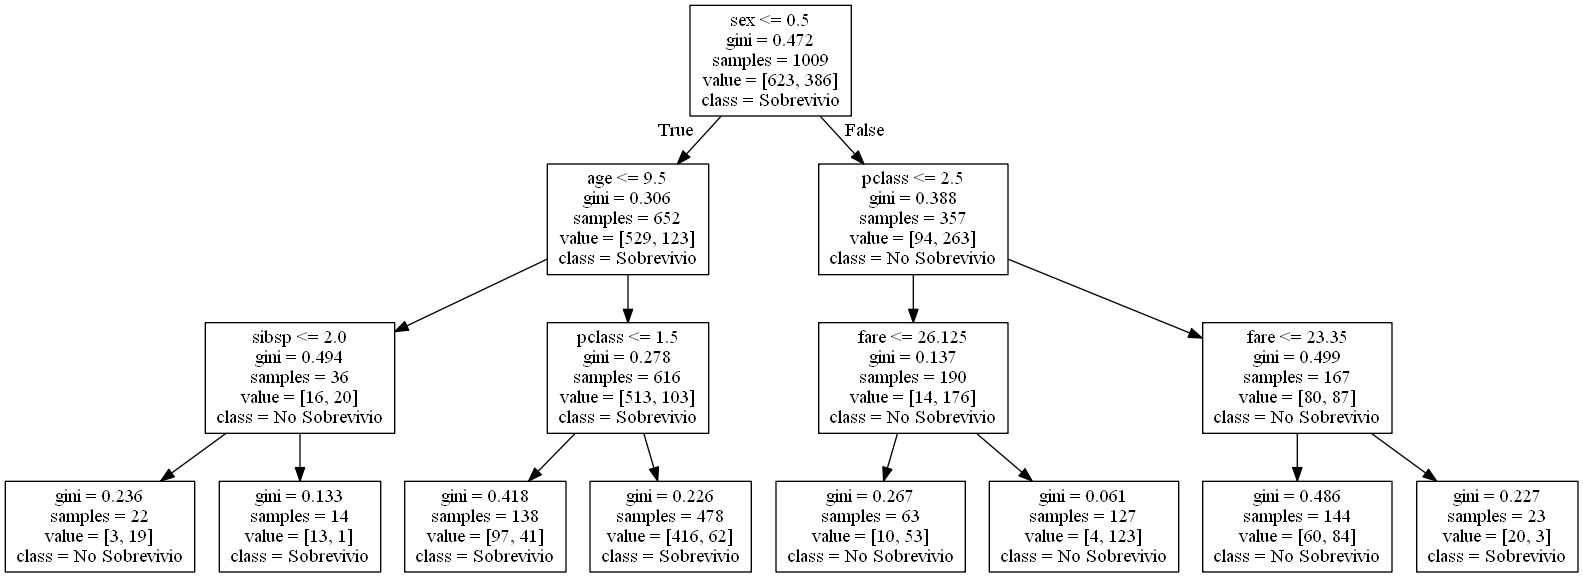

In [14]:
from IPython.display import Image  # conda install -c conda-forge pydotplus

from sklearn import tree
import pydotplus

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X_filtered.columns.values,
                                class_names=['Sobrevivio','No Sobrevivio'])
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())